Importação das bibliotecas

In [109]:
import pandas as pd
import numpy as np
import xlrd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Extração dos Arquivos


In [110]:
arquivo = xlrd.open_workbook('Tabelas1a21.xls')

planilhas_alvo = ['tab2', 'tab4', 'tab6', 'tab8', 'tab19']
abas = {}

for nome in planilhas_alvo:
    abas[nome] = arquivo.sheet_by_name(nome)

capitais = [
    'Porto Velho', 'Rio Branco', 'Manaus', 'Boa Vista', 'Belém', 'Macapá', 'Palmas',
    'São Luís', 'Teresina', 'Fortaleza', 'Natal', 'João Pessoa', 'Recife', 'Maceió',
    'Aracaju', 'Salvador', 'Belo Horizonte', 'Vitória', 'Rio de Janeiro', 'São Paulo',
    'Curitiba', 'Florianópolis', 'Porto Alegre', 'Campo Grande', 'Cuiabá', 'Goiânia', 'Brasília'
]

capitais_treinamento = capitais[:20]
capitais_teste = capitais[20:]

print(f"Capitais para treino ({len(capitais_treinamento)}): {capitais_treinamento}")
print(f"Capitais para teste ({len(capitais_teste)}): {capitais_teste}")

Capitais para treino (20): ['Porto Velho', 'Rio Branco', 'Manaus', 'Boa Vista', 'Belém', 'Macapá', 'Palmas', 'São Luís', 'Teresina', 'Fortaleza', 'Natal', 'João Pessoa', 'Recife', 'Maceió', 'Aracaju', 'Salvador', 'Belo Horizonte', 'Vitória', 'Rio de Janeiro', 'São Paulo']
Capitais para teste (7): ['Curitiba', 'Florianópolis', 'Porto Alegre', 'Campo Grande', 'Cuiabá', 'Goiânia', 'Brasília']


Tabela 2 (Domicílios por sexo - 2000)

In [111]:
def extrair_tabela2():
    aba2 = abas['tab2']
    dados = {}

    # achar ano 2000
    start_linha = None
    for i in range(aba2.nrows):
        if '2000' in str(aba2.cell_value(i, 0)):
            start_linha = i + 1
            break

    if start_linha is None:
        raise ValueError("Não encontrou dados de 2000 na Tabela 2")

    for i in range(start_linha, aba2.nrows):
        capital = str(aba2.cell_value(i, 0)).strip()
        if capital in capitais_treinamento:
            perc_mulheres = aba2.cell_value(i, 5)
            dados[capital] = perc_mulheres

    return dados

Tabela 4 (Mulheres +15 anos responsáveis por domicílios - 2000)


In [112]:
def extrair_tabela4():
    aba4 = abas['tab4']
    dados = {}

    start_linha = None
    for i in range(aba4.nrows):
        if '2000' in str(aba4.cell_value(i, 0)):
            start_linha = i + 1
            break

    if start_linha is None:
        raise ValueError("Não encontrou dados de 2000 na Tabela 4")

    for i in range(start_linha, aba4.nrows):
        capital = str(aba4.cell_value(i, 0)).strip()
        if capital in capitais_treinamento:
            perc_25_29 = aba4.cell_value(i, 4)
            perc_35_39 = aba4.cell_value(i, 6)
            perc_45_49 = aba4.cell_value(i, 8)
            dados[capital] = {
                'perc_25_29': perc_25_29,
                'perc_35_39': perc_35_39,
                'perc_45_49': perc_45_49
            }

    return dados

Tabela 6 (Responsáveis por domicílios, por média de anos de estudo e sexo - 2000)



In [113]:
def extrair_tabela6():
    aba6 = abas['tab6']
    dados = {}

    start_linha = None
    for i in range(aba6.nrows):
        if '2000' in str(aba6.cell_value(i, 0)):
            start_linha = i + 1
            break

    if start_linha is None:
        raise ValueError("Não encontrou dados de 2000 na Tabela 6")

    for i in range(start_linha, aba6.nrows):
        capital = str(aba6.cell_value(i, 0)).strip()
        if capital in capitais_treinamento:
            anos_estudo = aba6.cell_value(i, 1)
            dados[capital] = anos_estudo

    return dados

Tabela 8 (Rendimento mensal médio, mulheres 10+ anos - 2000)



In [114]:
def extrair_tabela8():
    aba8 = abas['tab8']
    dados = {}

    start_linha = None
    for i in range(aba8.nrows):
        if '2000' in str(aba8.cell_value(i, 0)):
            start_linha = i + 1
            break

    if start_linha is None:
        raise ValueError("Não encontrou dados de 2000 na Tabela 8")

    for i in range(start_linha, aba8.nrows):
        capital = str(aba8.cell_value(i, 0)).strip()
        if capital in capitais_treinamento:
            rendimento = aba8.cell_value(i, 2)
            dados[capital] = rendimento

    return dados

Tabela 19 (Proporção população 10+ anos por alfabetização e sexo - 2000)



In [115]:
def extrair_tabela19():
    aba19 = abas['tab19']
    dados = {}

    start_linha = None
    for i in range(aba19.nrows):
        if '2000' in str(aba19.cell_value(i, 0)):
            start_linha = i + 1
            break

    if start_linha is None:
        raise ValueError("Não encontrou dados de 2000 na Tabela 19")

    for i in range(start_linha, aba19.nrows):
        capital = str(aba19.cell_value(i, 0)).strip()
        # Alterado para incluir todas as capitais
        if capital in capitais:
            try:
                perc_criancas = aba19.cell_value(i, 3)
                dados[capital] = perc_criancas
            except:
                for col in range(1, aba19.ncols):
                    try:
                        valor = aba19.cell_value(i, col)
                        if isinstance(valor, (int, float)) and 0 <= valor <= 100:
                            perc_criancas = valor
                            dados[capital] = perc_criancas
                            break
                    except:
                        continue

    return dados

Extraindo

In [116]:
dados_tabela2 = extrair_tabela2()
dados_tabela4 = extrair_tabela4()
dados_tabela6 = extrair_tabela6()
dados_tabela8 = extrair_tabela8()
dados_tabela19 = extrair_tabela19()

Testando se pegou tudo



In [117]:
print("Dados da Tabela 2:", dados_tabela2)
print("Dados da Tabela 4:", dados_tabela4)
print("Dados da Tabela 6:", dados_tabela6)
print("Dados da Tabela 8:", dados_tabela8)
print("Dados da Tabela 19:", dados_tabela19)

Dados da Tabela 2: {'Porto Velho': 28.92975789297579, 'Rio Branco': 31.23068759948812, 'Manaus': 32.05793447799004, 'Boa Vista': 28.06391401554776, 'Belém': 35.37516196954972, 'Macapá': 33.269867549668874, 'Palmas': 23.38003252774845, 'São Luís': 34.10406910908812, 'Teresina': 31.41702646506176, 'Fortaleza': 33.205659226085814, 'Natal': 30.273985701670014, 'João Pessoa': 31.743983142922993, 'Recife': 37.40233284222732, 'Maceió': 32.3129762584237, 'Aracaju': 35.344376933558436, 'Salvador': 37.458409655869175, 'Belo Horizonte': 33.0116939057709, 'Vitória': 33.84137076603006, 'Rio de Janeiro': 35.33847810660211, 'São Paulo': 29.052869462825736}
Dados da Tabela 4: {'Porto Velho': {'perc_25_29': 10.144987401379653, 'perc_35_39': 14.74658184972531, 'perc_45_49': 11.198314676360031}, 'Rio Branco': {'perc_25_29': 10.123925644613232, 'perc_35_39': 12.617429542274635, 'perc_45_49': 10.488706775934439}, 'Manaus': {'perc_25_29': 10.030348724017484, 'perc_35_39': 13.415472123074574, 'perc_45_49': 1

DataFrame dos Dados Extraídos



In [119]:
dataset = []

for capital in capitais_treinamento:
    if (capital in dados_tabela2 and
        capital in dados_tabela4 and
        capital in dados_tabela6 and
        capital in dados_tabela8 and
        capital in dados_tabela19):

        tab2_val = dados_tabela2[capital]
        tab4_val = dados_tabela4[capital]
        tab6_val = dados_tabela6[capital]
        tab8_val = dados_tabela8[capital]
        tab19_val = dados_tabela19[capital]

        linha = {
            'capital': capital,
            'perc_mulheres': tab2_val,
            'perc_25_29': tab4_val['perc_25_29'],
            'perc_35_39': tab4_val['perc_35_39'],
            'perc_45_49': tab4_val['perc_45_49'],
            'anos_estudo': tab6_val,
            'rendimento': tab8_val,
            'alfabetizacao': tab19_val
        }
        dataset.append(linha)

df = pd.DataFrame(dataset)
print(f"Capitais de treinamento:")
df.head(27)

Capitais de treinamento:


,capital,perc_mulheres,perc_25_29,perc_35_39,perc_45_49,anos_estudo,rendimento,alfabetizacao
0,Porto Velho,28.929758,10.144987,14.746582,11.198315,6.807736,650.66,92.290688
1,Rio Branco,31.230688,10.123926,12.617430,10.488707,5.842848,526.33,88.012278
2,Manaus,32.057934,10.030349,13.415472,10.998072,7.116276,592.34,94.109185
3,Boa Vista,28.063914,11.328753,15.034352,10.334746,6.739421,630.66,92.486446
4,Belém,35.375162,7.684457,11.740354,11.185196,7.435013,651.88,94.908148
5,Macapá,33.269868,11.868624,14.122916,10.002488,6.849520,671.75,91.360476
6,Palmas,23.380033,15.059800,15.084208,8.408592,7.548321,655.86,94.505742
7,São Luís,34.104069,8.625614,13.075440,11.026693,7.477652,549.91,93.324636
8,Teresina,31.417026,7.418865,12.422896,11.924180,6.308521,503.62,87.368525
9,Fortaleza,33.205659,6.944381,11.636174,11.058573,6.723686,648.13,89.851479


Normalização

Preparando características e alvos


In [120]:
rendimento_mediana = df['rendimento'].median()
df['classe_alvo'] = (df['rendimento'] > rendimento_mediana).astype(int)

print(f"Mediana do rendimento: R$ {rendimento_mediana:.2f}")
print("\nDistribuição das classes:")
print(df['classe_alvo'].value_counts())

caracteristicas = ['perc_mulheres', 'perc_25_29', 'perc_35_39', 'perc_45_49',
           'anos_estudo', 'alfabetizacao']

X = df[caracteristicas].values
regressao_y = df['rendimento'].values
classificacao_y = df['classe_alvo'].values

print(f"\nShape dados: X {X.shape}, y {classificacao_y.shape}")

Mediana do rendimento: R$ 656.84

Distribuição das classes:
classe_alvo
0    10
1    10
Name: count, dtype: int64

Shape dados: X (20, 6), y (20,)


Pré-Processamento


In [121]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, classificacao_y, test_size=0.2, random_state=42, stratify=classificacao_y
)

normalizador = StandardScaler()
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_teste_normalizado = normalizador.transform(X_teste)

print(f"Treino: {X_treino_normalizado.shape}, Teste: {X_teste_normalizado.shape}")
print(f"Distribuição treino: {np.bincount(y_treino)}")
print(f"Distribuição teste: {np.bincount(y_teste)}")

Treino: (16, 6), Teste: (4, 6)
Distribuição treino: [8 8]
Distribuição teste: [2 2]


MLP com 3 camadas ocultas + a camada de saída
O foward() define os caminhos que os dados percorrem da entrada a saída.



In [122]:
class ClassificadorMLP(nn.Module):
    def __init__(self, tam_entrada, oculta1=64, oculta2=32, oculta3=16, tamanho_saida=2):
        super(ClassificadorMLP, self).__init__()
        self.camada1 = nn.Linear(tam_entrada, oculta1)    # cams ocultas 1 a 3
        self.camada2 = nn.Linear(oculta1, oculta2)
        self.camada3 = nn.Linear(oculta2, oculta3)
        self.camada_saida = nn.Linear(oculta3, tamanho_saida) # saída
        self.ativacao = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

        # os números nos args 64, 32 e 16 são a qntd neuronios

    def forward(self, x):
        x = self.ativacao(self.camada1(x))
        x = self.dropout(x)
        x = self.ativacao(self.camada2(x))
        x = self.dropout(x)
        x = self.ativacao(self.camada3(x))
        x = self.dropout(x)
        x = self.camada_saida(x)
        return x

Inicialização do MLP



In [123]:
tam_entrada = X_treino_normalizado.shape[1]
modelo = ClassificadorMLP(tam_entrada=tam_entrada)
print(modelo)

ClassificadorMLP(
  (camada1): Linear(in_features=6, out_features=64, bias=True)
  (camada2): Linear(in_features=64, out_features=32, bias=True)
  (camada3): Linear(in_features=32, out_features=16, bias=True)
  (camada_saida): Linear(in_features=16, out_features=2, bias=True)
  (ativacao): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


Configuração do treinamento


In [124]:
X_treino_tensor = torch.FloatTensor(X_treino_normalizado)
y_treino_tensor = torch.LongTensor(y_treino)
X_teste_tensor = torch.FloatTensor(X_teste_normalizado)
y_teste_tensor = torch.LongTensor(y_teste)

Configuração do critério e do otimizador



In [136]:
criterio = nn.CrossEntropyLoss()
otimizador = optim.Adam(modelo.parameters(), lr=0.001, weight_decay=1e-4)

# lr = taxa de aprendizado, n ta nem alta nem baixa mas podem mexer p ir testando
# weight decay = "castiga" pesos grandes p n ter overfitting

batch_size = 8 # lotes de 8 amostras d treino

# As linhas abaixo foram movidas da célula anterior para garantir que os tensores
# X_treino_tensor e y_treino_tensor estejam sempre atualizados e com o tamanho correto.
X_treino_tensor = torch.FloatTensor(X_treino_normalizado)
y_treino_tensor = torch.LongTensor(y_treino)
X_teste_tensor = torch.FloatTensor(X_teste_normalizado)
y_teste_tensor = torch.LongTensor(y_teste)

dataset_treino = torch.utils.data.TensorDataset(X_treino_tensor, y_treino_tensor)
carregador_treino = torch.utils.data.DataLoader(dataset_treino, batch_size=batch_size, shuffle=True)

perdas_treino = []
acuracia_teste = []
erros_por_epoca = []

----------------------------------------------------------------------

Treinamento com batch

In [137]:
print(f"Tamanho X_teste_tensor: {X_teste_tensor.size()}")
print(f"Tamanho y_teste_tensor: {y_teste_tensor.size()}")

Tamanho X_teste_tensor: torch.Size([4, 6])
Tamanho y_teste_tensor: torch.Size([4])


In [138]:
epocas = 100

for epoca in range(epocas):

    modelo.train()
    perda_total_epoca = 0

    for lote_X, lote_y in carregador_treino:
        otimizador.zero_grad()            # Zera gradientes
        saidas = modelo(lote_X)           # Forward Pass
        perda = criterio(saidas, lote_y)  # Calcula Loss (Perda)
        perda.backward()                  # Backward Pass (calcula gradientes)
        otimizador.step()                 # Atualiza pesos

        perda_total_epoca += perda.item()

    modelo.eval()
    with torch.no_grad():

        saidas_teste = modelo(X_teste_tensor)

        _, previsoes = torch.max(saidas_teste, 1)

        acc = (previsoes == y_teste_tensor).float().mean().item()

    perdas_treino.append(perda_total_epoca)
    erros_por_epoca.append(perda_total_epoca)
    acuracia_teste.append(acc)

    print(f"Época {epoca+1}/{epocas} |  Loss treino: {perda_total_epoca:.4f} | Acurácia Teste: {acc:.4f}")


Época 1/100 |  Loss treino: 0.2061 | Acurácia Teste: 0.7500
Época 2/100 |  Loss treino: 0.3382 | Acurácia Teste: 0.7500
Época 3/100 |  Loss treino: 0.4240 | Acurácia Teste: 0.7500
Época 4/100 |  Loss treino: 0.1972 | Acurácia Teste: 0.7500
Época 5/100 |  Loss treino: 0.4632 | Acurácia Teste: 0.7500
Época 6/100 |  Loss treino: 0.5152 | Acurácia Teste: 0.7500
Época 7/100 |  Loss treino: 0.3320 | Acurácia Teste: 0.7500
Época 8/100 |  Loss treino: 0.2212 | Acurácia Teste: 1.0000
Época 9/100 |  Loss treino: 0.4441 | Acurácia Teste: 1.0000
Época 10/100 |  Loss treino: 0.1447 | Acurácia Teste: 0.7500
Época 11/100 |  Loss treino: 0.2167 | Acurácia Teste: 0.7500
Época 12/100 |  Loss treino: 0.3154 | Acurácia Teste: 0.7500
Época 13/100 |  Loss treino: 0.4687 | Acurácia Teste: 0.7500
Época 14/100 |  Loss treino: 0.3029 | Acurácia Teste: 0.7500
Época 15/100 |  Loss treino: 0.5730 | Acurácia Teste: 0.7500
Época 16/100 |  Loss treino: 0.2986 | Acurácia Teste: 0.7500
Época 17/100 |  Loss treino: 0.28

Teste funções de ativção


In [139]:
class ClassificadorMLP_Exp(nn.Module):
    def __init__(self, tam_entrada, ativacao_func, oculta1=64, oculta2=32, oculta3=16, tamanho_saida=2):
        super(ClassificadorMLP_Exp, self).__init__()

        # A função de ativação é definida dinamicamente
        self.ativacao = ativacao_func

        self.camada1 = nn.Linear(tam_entrada, oculta1)
        self.camada2 = nn.Linear(oculta1, oculta2)
        self.camada3 = nn.Linear(oculta2, oculta3)
        self.camada_saida = nn.Linear(oculta3, tamanho_saida)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # Aplica a função de ativação fornecida
        x = self.ativacao(self.camada1(x))
        x = self.dropout(x)
        x = self.ativacao(self.camada2(x))
        x = self.dropout(x)
        x = self.ativacao(self.camada3(x))
        x = self.dropout(x)
        x = self.camada_saida(x)
        return x

Teste1

In [140]:
def teste_ativacao(modelo, carregador_treino, X_teste_tensor, y_teste_tensor, epocas=100, lr=0.001):

    criterio = nn.CrossEntropyLoss()
    otimizador = optim.Adam(modelo.parameters(), lr=lr, weight_decay=1e-4)

    historico_perda = []
    historico_acuracia = []

    for epoca in range(epocas):
        modelo.train()
        perda_total_epoca = 0

        for lote_X, lote_y in carregador_treino:
            otimizador.zero_grad()
            saidas = modelo(lote_X)
            perda = criterio(saidas, lote_y)
            perda.backward()
            otimizador.step()
            perda_total_epoca += perda.item()

        modelo.eval()
        with torch.no_grad():
            saidas_teste = modelo(X_teste_tensor)
            _, previsoes = torch.max(saidas_teste, 1)
            acc = (previsoes == y_teste_tensor).float().mean().item()

        historico_perda.append(perda_total_epoca)
        historico_acuracia.append(acc)

        if (epoca + 1) % 20 == 0:
            print(f"  > Época {epoca+1}/{epocas} | Perda Treino: {perda_total_epoca:.4f} | Acurácia Teste: {acc:.4f}")

    # Acurácia final
    acuracia_final = historico_acuracia[-1]

    return historico_perda, historico_acuracia, acuracia_final

Teste2

In [145]:
tam_entrada = X_treino_normalizado.shape[1]
epocas_experimento = 100

resultados = {}

funcoes_ativacao = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU(0.01)
}

print(f"Total de épocas por modelo: {epocas_experimento}\n")

for nome_ativacao, func_ativacao in funcoes_ativacao.items():
    print(f"{nome_ativacao}")

    modelo_exp = ClassificadorMLP_Exp(tam_entrada=tam_entrada, ativacao_func=func_ativacao)

    perda_hist, acc_hist, acc_final = teste_ativacao(
        modelo_exp, carregador_treino, X_teste_tensor, y_teste_tensor, epocas=epocas_experimento
    )

    resultados[nome_ativacao] = {
        'modelo': modelo_exp,
        'perda_hist': perda_hist,
        'acc_hist': acc_hist,
        'acc_final': acc_final
    }
    print(f"Acurácia Final: {acc_final:.4f}\n")

print("--- Resumo dos Resultados ---")
for nome, res in resultados.items():
    print(f"Ativação {nome}: Acurácia Final = {res['acc_final']:.4f}")

Total de épocas por modelo: 100

Sigmoid
  > Época 20/100 | Perda Treino: 1.3499 | Acurácia Teste: 0.5000
  > Época 40/100 | Perda Treino: 1.4023 | Acurácia Teste: 1.0000
  > Época 60/100 | Perda Treino: 1.4253 | Acurácia Teste: 0.5000
  > Época 80/100 | Perda Treino: 1.4755 | Acurácia Teste: 0.7500
  > Época 100/100 | Perda Treino: 1.3408 | Acurácia Teste: 0.7500
Acurácia Final: 0.7500

Tanh
  > Época 20/100 | Perda Treino: 0.9715 | Acurácia Teste: 0.7500
  > Época 40/100 | Perda Treino: 0.8902 | Acurácia Teste: 1.0000
  > Época 60/100 | Perda Treino: 0.8373 | Acurácia Teste: 1.0000
  > Época 80/100 | Perda Treino: 0.7290 | Acurácia Teste: 1.0000
  > Época 100/100 | Perda Treino: 0.6667 | Acurácia Teste: 1.0000
Acurácia Final: 1.0000

LeakyReLU
  > Época 20/100 | Perda Treino: 1.2826 | Acurácia Teste: 0.7500
  > Época 40/100 | Perda Treino: 0.8798 | Acurácia Teste: 0.7500
  > Época 60/100 | Perda Treino: 0.6557 | Acurácia Teste: 0.7500
  > Época 80/100 | Perda Treino: 0.5874 | Acuráci

Modelo Final

In [151]:
melhor_ativacao = None
melhor_score = {'acuracia': -1.0, 'perda': float('inf')}

for nome_ativacao, dados_resultado in resultados.items():

    acuracia_atual = dados_resultado['acc_final']
    perda_atual = dados_resultado['perda_hist'][-1]

    if acuracia_atual > melhor_score['acuracia']:

        melhor_score['acuracia'] = acuracia_atual
        melhor_score['perda'] = perda_atual
        melhor_ativacao = nome_ativacao
        melhor_modelo_objeto = dados_resultado['modelo']

    elif acuracia_atual == melhor_score['acuracia']:

        if perda_atual < melhor_score['perda']:
            melhor_score['perda'] = perda_atual
            melhor_ativacao = nome_ativacao
            melhor_modelo_objeto = dados_resultado['modelo']

print("Modelo Final\n")
print(f"Melhor Função de Ativação: {melhor_ativacao}")
print(f"Acurácia Final: {melhor_score['acuracia']:.4f}")
print(f"Perda: {melhor_score['perda']:.4f}")

Modelo Final

Melhor Função de Ativação: LeakyReLU
Acurácia Final: 1.0000
Perda: 0.4221


Graficos

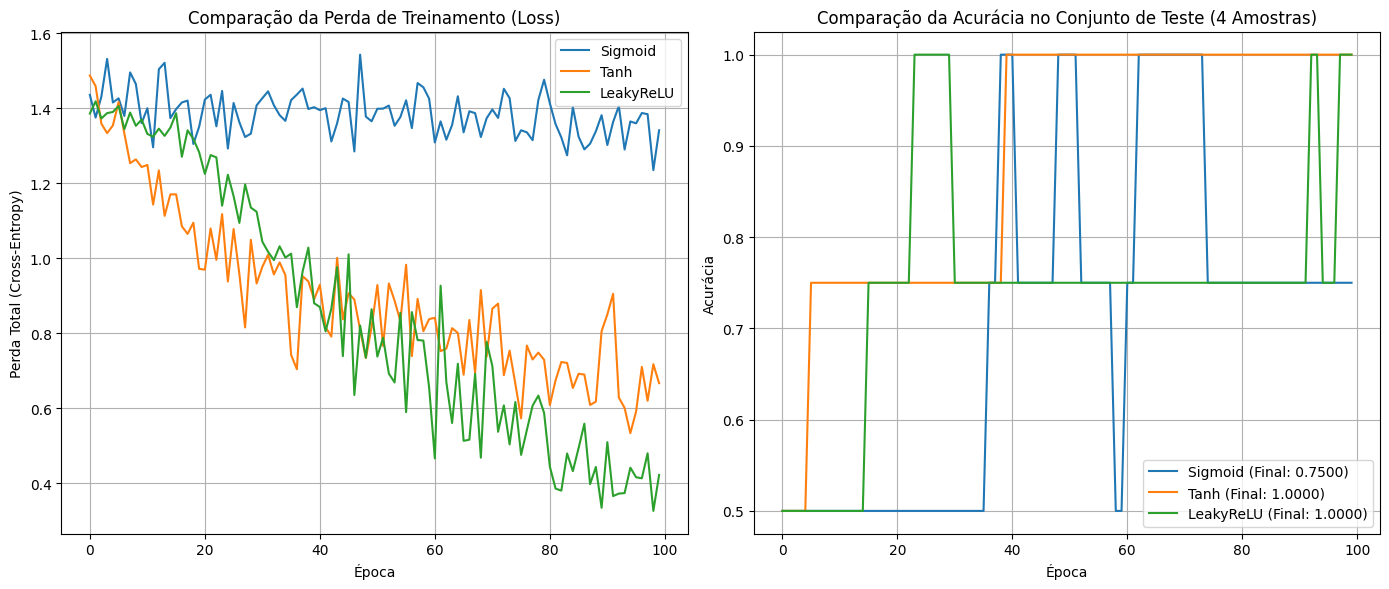

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Grafico Perda de Treinamento
plt.subplot(1, 2, 1)
plt.title('Comparação da Perda de Treinamento (Loss)')
plt.xlabel('Época')
plt.ylabel('Perda Total (Cross-Entropy)')
for nome_ativacao, res in resultados.items():
    plt.plot(res['perda_hist'], label=f'{nome_ativacao}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Grafico Acurácia no Teste
plt.subplot(1, 2, 2)
plt.title('Comparação da Acurácia no Conjunto de Teste (4 Amostras)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
for nome_ativacao, res in resultados.items():
    plt.plot(res['acc_hist'], label=f'{nome_ativacao} (Final: {res["acc_final"]:.4f})')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()